Using a modified version of Steve's specular distribution of angles, creating a source with varied angles. (continuing from the end of RotatingSource)

Mira

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *
from random import uniform

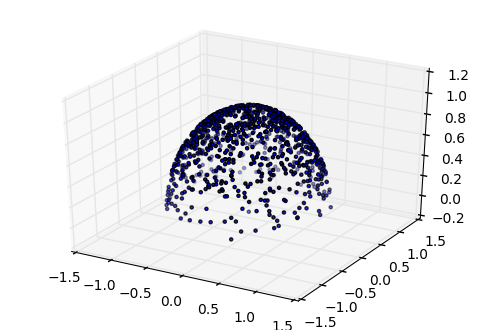

In [2]:
xspec,yspec,zspec = spec(1000)
pl3d = pl.figure().gca(projection = '3d')
pl3d.scatter(xspec,yspec,zspec,marker=".")
pl.show()

In [3]:
def make_specsource(p,L, theta):
    Lwant = int(L)
    x = []
    y = []
    z = []
    xspec,yspec,zspec = spec(len(p))
    for i in range (1,len(p)):
        Vi = [xspec[i], yspec[i], zspec[i]]
        Vi2 = np.array(np.dot(Vi,Rx(theta)))
        xLi,yLi,zLi = make_line(p[i],Vi2[0],Lwant)
        x.append(xLi)
        y.append(yLi)
        z.append(zLi)
    return x,y,z

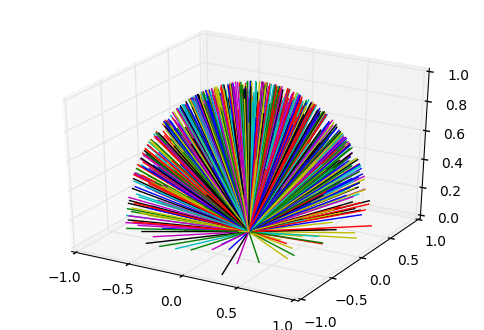

In [4]:
#first an attempt to demonstrate the different rays with this specular distribution of angles
pl3d = pl.figure().gca(projection = '3d')
origin = [0,0,0]
for i in range (1,len(xspec)):
    v = [xspec[i], yspec[i], zspec[i]]
    x2,y2,z2 = make_line(origin,v,2)
    pl.plot(x2,y2,z2)
pl.show()
#check problem in MAKE_LINE VectLNorm? does it just mean it is too small?

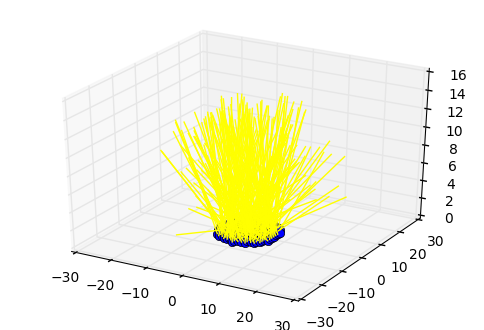

In [5]:
#NOW using points OTHER than the origin
axis = [0,0,8] #hkr
x,y,z=shape_source(axis,0) #circle and location in z-axis
points = list_points(x,y,z)
pl3d = pl.figure().gca(projection = '3d')
pl.plot(x,y,z, marker = 'o')
x3,y3,z3 = make_specsource(points,20, 0)
for n in range (0,len(points)-1):
    pl3d.plot(x3[n],y3[n],z3[n], color = 'yellow')  
pl.show()

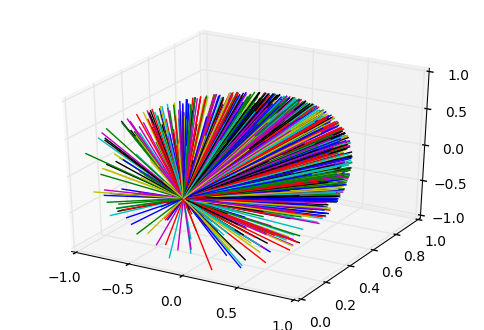

In [29]:
#NOW rotating it pi/2
pl3d = pl.figure().gca(projection = '3d')
origin = [0,0,0]
for i in range (1,len(xspec)):
    v = [xspec[i], yspec[i], zspec[i]]
    v2 = np.array(np.dot(v,Rx(np.pi/2)))
    x2,y2,z2 = make_line(origin,v2[0],2)
    pl.plot(x2,y2,z2)
pl.show()
#check problem in MAKE_LINE VectLNorm? does it just mean it is too small?

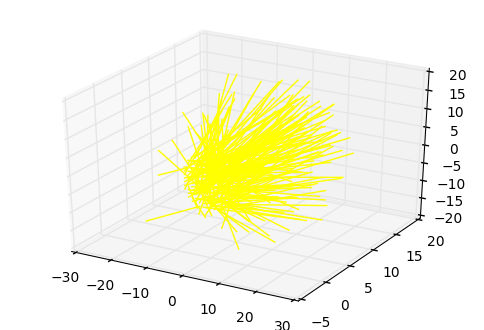

In [7]:
#NOW rotating it pi/2 WITH A ROTATED SOURCE THAT ISN'T THE ORIGIN
#NOW using points OTHER than the origin
axis = [0,0,8] #hkr
x5,y5,z5=rotated_source(np.pi/2, axis,0) #circle and location in z-axis
points5 = list_points(x5,y5,z5)
pl3d = pl.figure().gca(projection = '3d')
#pl.plot(x5,y5,z5, marker = 'o')
x6,y6,z6 = make_specsource(points5,20, np.pi/2)
for n in range (0,len(points)-1):
    pl3d.plot(x6[n],y6[n],z6[n], color = 'yellow')  
pl.show()

In [8]:
origin = [0,-64] #x,y
origin1 = [90,-64] #x,y
origin2 = [0,64]
origin3 = [90,64] #x,y 
coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X12,Y12,Z12,X22,Y22,Z22 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin, 'pos')
#Centered around x-axis, shifted
X32,Y32,Z32,X42,Y42,Z42 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
#centered around x-axis, not shifted, reversed. APPROPRIATELY ADJUSTED FOR FOCI
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin2, 'neg')
#centered around x-axis, shifted, reversed. APPROPRIATELY ADJUSTED FOR FOCI
X72,Y72,Z72,X82,Y82,Z82 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')

In [9]:
#source in ellipse with specular source
def reflect_specsourceellipse(coeffellipse,r,v,p,L, theta):
    points = p
    xi = []
    yi = []
    zi = []
    xr = []
    yr = []
    zr = []
    xp = []
    yp = []
    zp = []
    xspec,yspec,zspec = spec(len(p))
    for i in range (1,len(points)-1):
        Vi = [xspec[i], yspec[i], zspec[i]]
        Vi2 = np.array(np.dot(Vi,Rx(theta)))
        xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL = reflectellipse(coeffellipse,r,Vi2[0],p[i],L)
        xi.append(xiL)
        yi.append(yiL)
        zi.append(ziL)
        xr.append(xrL)
        yr.append(yrL)
        zr.append(zrL)
        xp.append(xpL)
        yp.append(ypL)
        zp.append(zpL)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp

pl3dsurf = pl.figure().gca(projection = '3d')
#c = tangcoef(pli,v1,coeffellipse)
r = int(100)
p = [0,200,-50] #(x0,y0,z0)
v = [0.01,1,.01] #(a,b,c)
L = int(400)
coeffellipse = [263.9,256,64.15]
axis = [0,0,8] #hkr
#x,y,z=shape_source(axis,-50) #circle and location in z-axis
x4,y4,z4 = rotated_source(np.pi/2, axis, -60)
points4 = list_points(x4,y4,z4)
xi,yi,zi,xr,yr,zr,xp,yp,zp = reflect_specsourceellipse(coeffellipse,r,v,points4,L, np.pi/2)
for n in range (0,len(xi)):
    pl3dsurf.plot(xi[n],yi[n],zi[n])
    pl3dsurf.plot(xr[n],yr[n],zr[n])
    
#pl3dsurf.plot(xi,yi,zi, color = 'yellow')
#pl3dsurf.plot(xr,yr,zr, color = 'red')
pl3dsurf.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
ax=pl.gca()
ax.hold(True)

    
pl.show()
#obviously need to BLOCK rays that don't hit the ellipse from continuing. (HOW!?)

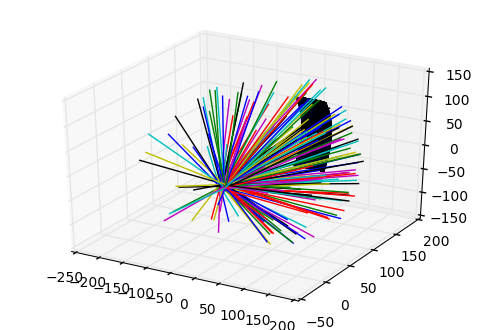

In [10]:
#blockign rays that don't hit within a specific area
#NOW rotating it pi/2 WITH A ROTATED SOURCE THAT ISN'T THE ORIGIN
#NOW using points OTHER than the origin
#have xint,yint,zint be within a certain range
axis = [0,0,8] #hkr
x5,y5,z5=rotated_source(np.pi/2, axis,0) #circle and location in z-axis
points5 = list_points(x5,y5,z5)
pl3d = pl.figure().gca(projection = '3d')
#pl.plot(x5,y5,z5, marker = 'o')
x6,y6,z6 = make_specsource(points5,200, np.pi/2)
for n in range (0,len(points)-1):
    pl3d.plot(x6[n],y6[n],z6[n]) #color = 'yellow')  
pl3d.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3d.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
pl.show()
#THESE used below

In [11]:
def setrange(xrange,ints): #given circle and intersection points, only keep points within sphere
    xintG = []
    yintG = []
    zintG = []
    for i in range (0,len(ints)):
        xinti = ints[i][0]
        yinti = ints[i][1]
        zinti = ints[i][2]
        if xinti <= xrange and xinti >=-xrange:
            xintG.append(xinti)
            yintG.append(yinti)
            zintG.append(zinti)
    return xintG,yintG,zintG

In [12]:
def setrange2d(xrange,ints): #given circle and intersection points, only keep points within CIRCULE
    xintG = []
    zintG = []
    for i in range (0,len(ints)):
        xinti = ints[i][0]
        zinti = ints[i][2]
        if xinti <= xrange and xinti >=-xrange and zinti <= xrange and zinti >= -xrange:
            xintG.append(xinti)
            zintG.append(zinti)
    return xintG,zintG

In [13]:
r = int(100)
p = [0,20,-50] #(x0,y0,z0)
v = [0.01,1,.01] #(a,b,c)
L = int(400)
coeffellipse = [263.9,256,64.15]
#EDITTED SPECIFICALLY TO MAKE INTERSECTION CLEAR
def reflectellipsePOINT(coeffellipse,r,v,p,L):
        c = tangcoef(p,v,coeffellipse) #plane coefficients
        VectL = v #incident vector#defining points of incident vector
        VectLinit = [-a for a in v]
        VectLNorm = norm(v) #incident unit vector
        dU, N = plane_info(c,r) #gradient and normal of plane
        #reflected ray
        #VectL2 = VectLNorm + 2*N #reflected vector
        VectL2 = VectLNorm - 2*N #IS IT PLUS OR MINUS
        VectLNorm2 = norm(VectL2) #reflected unit vector
        xp,yp,zp = make_plane(c,r) #plane
        xint,yint,zint = ellipselineint(p,v,coeffellipse)
        pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
        xi,yi,zi = make_line(pointint,VectLinit,L) #incident line from intersection point
        xr,yr,zr = make_line(pointint,VectL2,L)
        return xi,yi,zi,xr,yr,zr,xp,yp,zp, pointint

In [14]:
#source in ellipse with specular source
def reflect_specsourceellipsePOINT(coeffellipse,r,v,p,L, theta):
    points = p
    xi = []
    yi = []
    zi = []
    xr = []
    yr = []
    zr = []
    xp = []
    yp = []
    zp = []
    pointints = []
    xspec,yspec,zspec = spec(len(p))
    for i in range (1,len(points)-1):
        Vi = [xspec[i], yspec[i], zspec[i]]
        Vi2 = np.array(np.dot(Vi,Rx(theta)))
        xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL,pointint = reflectellipsePOINT(coeffellipse,r,Vi2[0],p[i],L)
        xi.append(xiL)
        yi.append(yiL)
        zi.append(ziL)
        xr.append(xrL)
        yr.append(yrL)
        zr.append(zrL)
        xp.append(xpL)
        yp.append(ypL)
        zp.append(zpL)
        pointints.append(pointint)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints

In [15]:
xi,yi,zi,xr,yr,zr,xp,yp,zp,pointints = reflect_specsourceellipsePOINT(coeffellipse,r,v,points5,L, np.pi/2)

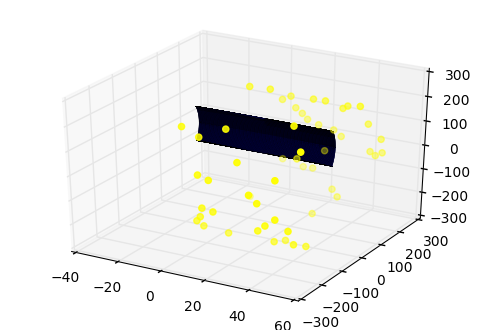

In [16]:
xints,yints,zints = setrange(50, pointints)
pl3d = pl.figure().gca(projection = '3d')
pl3d.scatter(xints,yints,zints, marker = 'o', color = 'yellow')
pl3d.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3d.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
ax=pl.gca()
ax.hold(True)
pl.show()

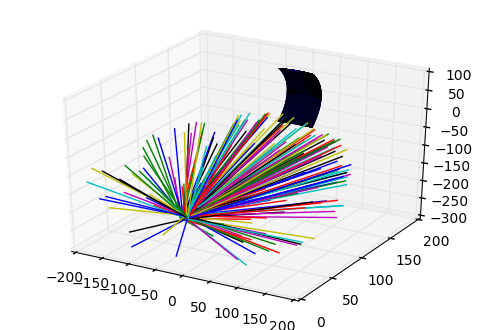

In [17]:
#blockign rays that don't hit within a specific area
#NOW rotating it pi/2 WITH A ROTATED SOURCE THAT ISN'T THE ORIGIN
#NOW using points OTHER than the origin
#have xint,yint,zint be within a certain range
axis = [0,150,8] #hkr
x5,y5,z5=rotated_source(np.pi/2, axis,0) #circle and location in z-axis
points5 = list_points(x5,y5,z5)
pl3d = pl.figure().gca(projection = '3d')
#pl.plot(x5,y5,z5, marker = 'o')
x6,y6,z6 = make_specsource(points5,200, np.pi/2)
for n in range (0,len(points)-1):
    pl3d.plot(x6[n],y6[n],z6[n]) #color = 'yellow')  
pl3d.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3d.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
pl.show()
#THESE used below

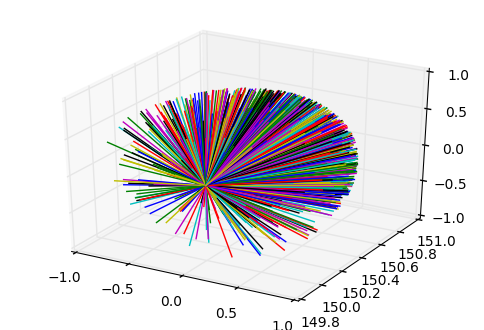

In [18]:
#NOW rotating it pi/2
pl3d = pl.figure().gca(projection = '3d')
origin = [0,150,0]
for i in range (1,len(xspec)):
    v = [xspec[i], yspec[i], zspec[i]]
    v2 = np.array(np.dot(v,Rx(np.pi/2)))
    x2,y2,z2 = make_line(origin,v2[0],2)
    pl.plot(x2,y2,z2)
pl.show()
#check problem in MAKE_LINE VectLNorm? does it just mean it is too small?

In [21]:
def pointspecsource(specnum,origin, L):
    xspec,yspec,zspec = spec(int(specnum))
    x = []
    y = []
    z = []
    for i in range (1,len(xspec)):
        v = [xspec[i], yspec[i], zspec[i]]
        v2 = np.array(np.dot(v,Rx(np.pi/2)))
        x2,y2,z2 = make_line(origin,v2[0],int(L))
        x.append(x2)
        y.append(y2)
        z.append(z2)
    return x,y,z

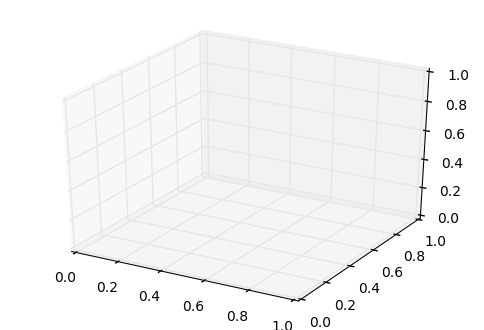

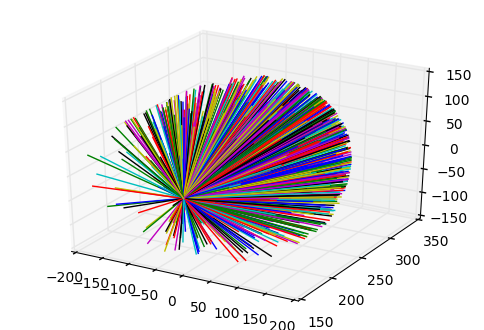

In [22]:
pl3d = pl.figure().gca(projection = '3d')
specnum = 1000
origin = [0,150,0]
L = 200
x8, y8, z8 = pointspecsource(specnum, origin, L)
for n in range (0,1000):
    pl3d.plot(x8[n],y8[n],z8[n])
pl.show()